# Word Segmentation Using LSTM

This notebook simulates a real-world example of word segmentation using Long Short-Term Memory (LSTM) networks. This example is useful in dealing with languages without spaces such as in OCR (Optical Character Recognition) tasks where spaces might be missing.

In this example, we'll simulate a basic word segmentation task using LSTM on a small dataset. We'll use a dataset of concatenated English words, and the model will learn to insert spaces between the words.


## Step 1: Import Necessary Libraries

In [ ]:
# Importing NumPy for numerical operations and array handling
import numpy as np

# Importing TensorFlow, a deep learning framework
import tensorflow as tf

# Importing specific layers from Keras (a high-level API within TensorFlow)
from tensorflow.keras.layers import LSTM, Dense, Embedding, Bidirectional, Dropout

# Importing the Sequential model API, which allows you to build a model layer-by-layer
from tensorflow.keras.models import Sequential

# Importing the utility to pad sequences to the same length for model input consistency
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Importing train_test_split to split the dataset into training and testing subsets
from sklearn.model_selection import train_test_split

# Importing callbacks to optimize training:
# - EarlyStopping halts training when validation performance stops improving
# - ReduceLROnPlateau lowers learning rate when validation performance plateaus
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Importing the JSON library for reading and writing structured data
import json


## Step 2: Data Preparation

In [ ]:
# Simulated real-world data: Concatenated English words without spaces,
# with corresponding labels for word segmentation.
# "B" = Beginning of a word, "I" = Inside a word
data = [
    ("ilovecoding", ["B", "I", "I", "B", "I", "I", "I", "I", "B", "I", "I"]),
    ("machinelearningisfun", ["B", "I", "I", "I", "I", "I", "B", "I", "I", "I", "I", "I", "I", "I", "B", "I", "I", "I"]),
    ("deepneuralnetworks", ["B", "I", "I", "I", "B", "I", "I", "I", "I", "B", "I", "I", "I", "I", "I"]),
    ("artificialintelligence", ["B", "I", "I", "I", "I", "I", "I", "B", "I", "I", "I", "I", "I", "I", "I", "I", "I"]),
    ("dataisthenewoil", ["B", "I", "I", "I", "B", "I", "I", "B", "I", "I", "I", "B", "I", "I", "I"]),
]

# Creating a character-level vocabulary from the dataset
# 'chars' contains unique sorted characters from all input strings
chars = sorted(list(set("".join([seq for seq, _ in data]))))

# Mapping each character to a unique integer (starting from 1)
char_to_index = {c: i + 1 for i, c in enumerate(chars)}

# Reverse mapping from integer index back to character
index_to_char = {i + 1: c for i, c in enumerate(chars)}

# Defining the segmentation labels: B = Begin, I = Inside
labels = ["B", "I"]

# Mapping each label to an integer index
label_to_index = {l: i for i, l in enumerate(labels)}

# Reverse mapping from integer index to label
index_to_label = {i: l for l, i in label_to_index.items()}

# Encoding the input sequences into integer IDs based on char_to_index
X = [[char_to_index[c] for c in seq] for seq, _ in data]

# Encoding the corresponding label sequences based on label_to_index
y = [[label_to_index[l] for l in labels] for _, labels in data]

# Finding the maximum sequence length to pad all sequences to this length
maxlen = max(len(seq) for seq in X)

# Padding input sequences with 0s at the end to ensure uniform length
X = pad_sequences(X, maxlen=maxlen, padding='post')

# Padding label sequences similarly
y = pad_sequences(y, maxlen=maxlen, padding='post')

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Outputting the shapes of the training data to confirm preparation
print("Data prepared for training:")
print("X_train shape:", X_train.shape)  # Shape: (num_samples, maxlen)
print("y_train shape:", y_train.shape)  # Shape: (num_samples, maxlen)


Data prepared for training:
X_train shape: (4, 22)
y_train shape: (4, 22)


## Step 3: Model fitting and validation

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.5000 - loss: 0.6924 - val_accuracy: 0.7727 - val_loss: 0.6795 - learning_rate: 0.0010
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.7386 - loss: 0.6798 - val_accuracy: 0.7727 - val_loss: 0.6665 - learning_rate: 0.0010
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - accuracy: 0.7614 - loss: 0.6650 - val_accuracy: 0.8182 - val_loss: 0.6514 - learning_rate: 0.0010
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.7727 - loss: 0.6500 - val_accuracy: 0.8182 - val_loss: 0.6332 - learning_rate: 0.0010
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - accuracy: 0.7841 - loss: 0.6288 - val_accuracy: 0.8182 - val_loss: 0.6111 - learning_rate: 0.0010
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.7841 - loss: 0.5994 - val_accuracy: 0.8182 - val_loss: 0.5849 - learning_rate: 0.0010
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.7955 - loss: 0.5623 - val_accuracy: 0

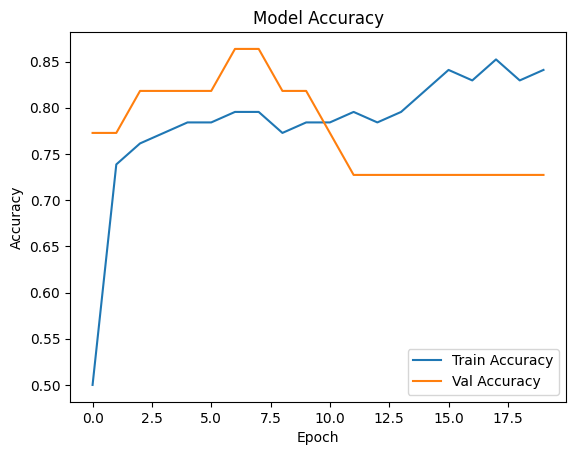

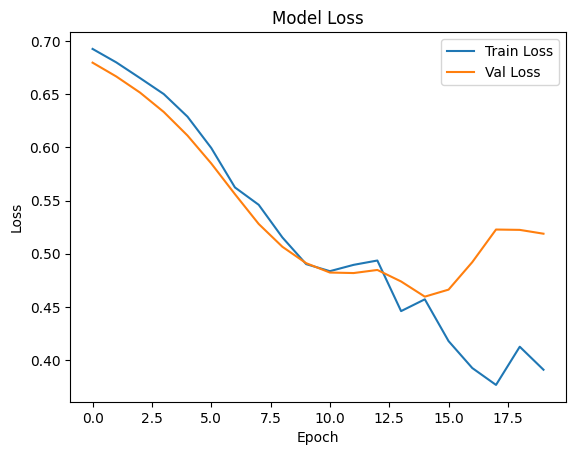

In [ ]:
# Define the LSTM model using a Sequential API
model = Sequential([
    # Embedding layer: converts character indices into dense vector representations
    # input_dim = vocab size + 1 (for padding 0), output_dim = size of embedding vectors
    # input_length = length of padded sequences
    Embedding(input_dim=len(char_to_index) + 1, output_dim=64, input_length=maxlen),

    # First Bidirectional LSTM layer: processes sequence forwards and backwards
    # return_sequences=True ensures the LSTM outputs at every time step (not just final one)
    Bidirectional(LSTM(units=128, return_sequences=True)),

    # Second Bidirectional LSTM layer: stacked on top for deeper temporal representation
    Bidirectional(LSTM(units=64, return_sequences=True)),

    # Dropout layer: randomly sets 50% of inputs to 0 during training to prevent overfitting
    Dropout(0.5),

    # Dense output layer: one output per time step, with number of units = number of label classes (2: B and I)
    # softmax activation returns a probability distribution over the labels
    Dense(units=len(labels), activation='softmax')
])

# Compile the model with Adam optimizer and sparse categorical crossentropy loss
# 'sparse_categorical_crossentropy' is used since target labels are integers (not one-hot encoded)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Callback: Stop training early if validation loss doesn't improve for 5 epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Callback: Reduce learning rate by a factor of 0.5 if validation loss plateaus for 3 epochs
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

# Train the model with training data and validation data
# Callbacks help improve convergence and avoid overfitting
history = model.fit(
    X_train, y_train,
    epochs=50,  # Train up to 50 epochs
    validation_data=(X_test, y_test),  # Monitor performance on test set
    callbacks=[early_stopping, reduce_lr]  # Use early stopping and LR schedule
)

# Import matplotlib for plotting training history
import matplotlib.pyplot as plt

# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')  # Title for accuracy plot
plt.xlabel('Epoch')         # X-axis label
plt.ylabel('Accuracy')      # Y-axis label
plt.legend()                # Show legend
plt.show()                  # Display the plot

# Plot training and validation loss over epochs
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')     # Title for loss plot
plt.xlabel('Epoch')         # X-axis label
plt.ylabel('Loss')          # Y-axis label
plt.legend()                # Show legend
plt.show()                  # Display the plot


## Question

**The results are not ideal. What do you think could be the major reasons?**